# Hypothesis

We can predict how many medals a country will win at the Olympics by using historical data.

# The Data

A dataset of how many medals each country won at each Olympics.  Other data would also be nice (number of athletes, etc).

In [20]:
import pandas as pd

In [21]:
teams = pd.read_csv("teams.csv")

In [22]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [23]:
teams.corr()["medals"]

year            -0.021603
events           0.771330
athletes         0.840817
age              0.025096
height           0.141055
weight           0.090577
medals           1.000000
prev_medals      0.920048
prev_3_medals    0.918438
Name: medals, dtype: float64

<AxesSubplot:xlabel='athletes', ylabel='medals'>

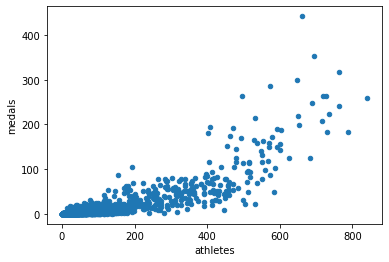

In [24]:
teams.plot.scatter(x="athletes", y="medals")

<AxesSubplot:xlabel='age', ylabel='medals'>

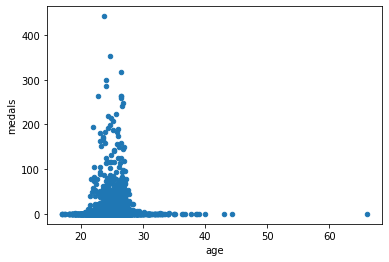

In [25]:
teams.plot.scatter(x="age", y="medals")

<AxesSubplot:ylabel='Frequency'>

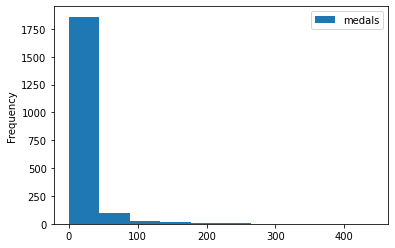

In [80]:
teams.plot.hist(y="medals")

In [36]:
teams[teams.isnull().any(axis=1)]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN,NaN


In [37]:
teams = teams.dropna()

In [38]:
teams.shape

(2014, 11)

In [61]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [62]:
# About 80% of the data
train.shape

(1609, 11)

In [63]:
# About 20% of the data
test.shape

(405, 11)

# Accuracy Metric

We'll use mean squared error.  This is a good default regression accuracy metric.  It's the average of squared differences between the actual results and your predictions.

In [83]:
from sklearn.linear_model import Ridge

reg = Ridge()

In [84]:
predictors = ["events", "athletes", "prev_medals", "prev_3_medals"]

In [85]:
reg.fit(train[predictors], train["medals"])

Ridge()

In [86]:
predictions = reg.predict(test[predictors])

In [87]:
predictions.shape

(405,)

In [88]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], predictions)
error

3.877733725148334

In [90]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [71]:
test["predictions"] = predictions

In [92]:
test[test["team"] == "USA"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
2053,USA,United States,2012,245,689,26.7,178.3,74.7,248,317.0,274.0,288.224179
2054,USA,United States,2016,245,719,26.4,178.0,73.8,264,248.0,276.0,270.117987


In [91]:
test[test["team"] == "IND"]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,predictions
907,IND,India,2012,55,95,26.0,174.2,72.7,6,3.0,1.7,2.060098
908,IND,India,2016,67,130,26.1,170.0,66.3,2,6.0,3.3,6.794597


In [93]:
errors = (test["medals"] - predictions).abs()

In [116]:
error_by_team = errors.groupby(test["team"]).mean()
medals_by_team = test["medals"].groupby(test["team"]).mean()
error_ratio =  error_by_team / medals_by_team 

In [118]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<AxesSubplot:ylabel='Frequency'>

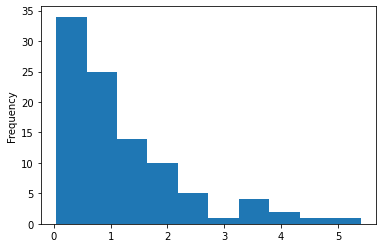

In [124]:
error_ratio.plot.hist()

In [122]:
error_ratio.sort_values()

team
FRA    0.041368
ITA    0.063601
USA    0.090512
HUN    0.098294
ETH    0.124946
         ...   
GUA    3.628789
AUT    3.822295
VEN    3.999255
UAE    4.786808
HKG    5.397588
Name: medals, Length: 97, dtype: float64

# Next steps

This model works well for countries which have a high medal count, and compete in a stable number of events annually.  For countries that get fewer medals, you'd want to build this model in a different way.

Some potential next steps:

* Add in some more predictors to the model, like `height` or `age`.
* Go back to the original, athlete-level data (`athlete_events.csv`), and try to compute some additional variables, like total number of years competing in the Olympics.
* For countries with low medal counts, you can try modelling if individual athletes will win their event.  You can build event-specific models to predict if athletes will win their events.  Then you can add up the predicted medals for each athlete from each country.  This will give you the total predicted medal count for that country.